<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/DNN_Classifications_Iris_and_MNIST_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Exerice 1 : Classification Iris**

In [ ]:
# Importation des bibliothèques 
import pandas as pd
import numpy as np

# Un ensemble de base de données téléchargeable
from sklearn import datasets 
# Fonctions pour le preprocessing 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split 



In [ ]:
# 1. load dataset
iris = datasets.load_iris()

# 2. features_target_split
# features
X = iris.data[:, :]  
# target
y = iris.target

'''# 3.# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)'''

# Conversion en one hot encoded en utilisant tf.keras
Y = tf.keras.utils.to_categorical(y)

# 3. train_test_split classic 
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.1)

'''# train_test_validation_split
X_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.2)'''

'# train_test_validation_split\nX_model, X_valid, y_model, y_valid = train_test_split(X_train, y_train, test_size = 0.2)'

In [ ]:
# 4. Construction du modèle 

# Artificial neural network

# Les fonctions d'initiation(Construction) du modèle 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

model= Sequential([
   Dense(16, input_dim = 4, activation='relu'),    
   Dense(3, activation='softmax') ])

# 5. Entraînement  
# Configuration du modèle(Back propagation configuration)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"]) 




In [ ]:
import time

start = time.time()

# 6. Ajustement du modèle
history = model.fit( X_train, y_train, validation_split = 0.2,  epochs= 300) 

print("The time used to execute this is given below")

end = time.time()

print(end - start)



In [ ]:
# Le sommaire

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


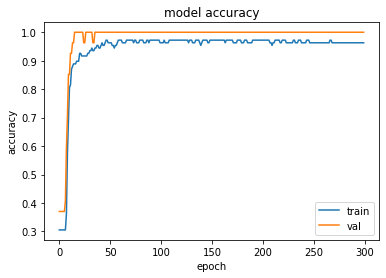

In [ ]:
# l'historique de l'Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

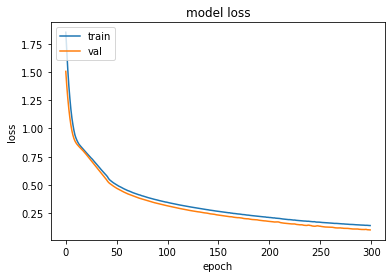

In [ ]:
# l'historique du coût 'loss'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Exercice 2 : Classification des chiffres(MNIST)**

In [ ]:
!pip install mnist 
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
import mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Normalize the images. 
# The pixel value is a single number that represents the brightness of the pixel, typically zero is taken to be black, and 255 is taken to be #white. After normalization we will get values between 0 and 1
train_images = (train_images / 255) 
test_images = (test_images / 255) 

# Flatten the images.
train_images = train_images.reshape((-1, 784)) 
test_images = test_images.reshape((-1, 784))

In [ ]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')])

In [ ]:
# Compile K model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data=(test_images, to_categorical(test_labels)))

In [ ]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data=(test_images, to_categorical(test_labels)))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9174 - val_loss: 0.1503 - val_accuracy: 0.9541
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1283 - accuracy: 0.9611 - val_loss: 0.1093 - val_accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0922 - accuracy: 0.9717 - val_loss: 0.1067 - val_accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9771 - val_loss: 0.0976 - val_accuracy: 0.9689
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0614 - accuracy: 0.9805 - val_loss: 0.0988 - val_accuracy: 0.9701


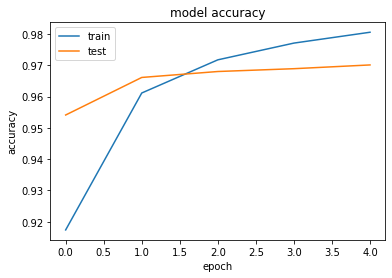

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels))


313/313 [==============================] - 1s 4ms/step - loss: 0.0988 - accuracy: 0.9701


[0.09882228076457977, 0.9700999855995178]

**Atelier 09 Septembre 2022**

**Les DNNs**


**1. Importation des bibliothèques**

In [ ]:
!pip install mnist
import warnings
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical


**2. Affectation et visualisation des données**

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()


In [ ]:
type(train_images)
print(train_images.shape)
type(train_images)


(60000, 28, 28)


numpy.ndarray

In [ ]:
train_labels
print(train_labels.shape)

(60000,)


**3. Preprocessing**

In [ ]:
print(train_images.min())
print(train_images.max())


0
255


**3.1. Min Max scaler ou appelée normalisation**

In [ ]:
# Normalize the images. 
# Les pixel varie entre [0,1] à la place de [0,255]

train_images = (train_images / 255) 
test_images = (test_images / 255) 


**3.2. Aplatire les images**

In [ ]:

# Aplatir les images(Flatten).
train_images = train_images.reshape((-1, 784)) 
test_images = test_images.reshape((-1, 784))

**4. Construction du modèle**


In [ ]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')])

**5. La compilation**

La compilation est à peu près la configuration de la backpropagation 

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

**6. Ajuster le modèle(Entraînement)**

In [ ]:
import time
be = time.time()
history = model.fit(train_images,
                    to_categorical(train_labels),#Utiliser to_categorical pour adapter les outputs à la sortie du modèle
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_images, to_categorical(test_labels)))
end = time.time()

print("le temps d'exécution est égale à  " +str(end-be))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2784 - accuracy: 0.9202 - val_loss: 0.1491 - val_accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1264 - accuracy: 0.9622 - val_loss: 0.1125 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0957 - accuracy: 0.9711 - val_loss: 0.1061 - val_accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0767 - accuracy: 0.9761 - val_loss: 0.0962 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0923 - val_accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.0925 - val_accuracy:

**7. Voir l’historique de l’entraînement**

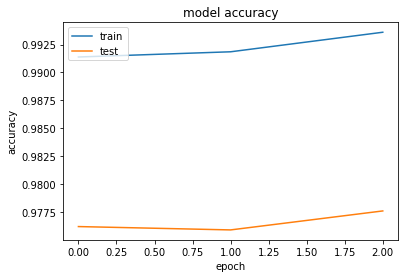

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**8. Faire face au sur-entraînement(Overfiting)**

**8.1. Early Stopping**

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.9173 - val_loss: 0.1701 - val_accuracy: 0.9477
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1283 - accuracy: 0.9616 - val_loss: 0.1098 - val_accuracy: 0.9671
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9719 - val_loss: 0.1025 - val_accuracy: 0.9680
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.1002 - val_accuracy: 0.9674
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9818 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0900 - val_accuracy: 0.9723
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1046 - val_accuracy:

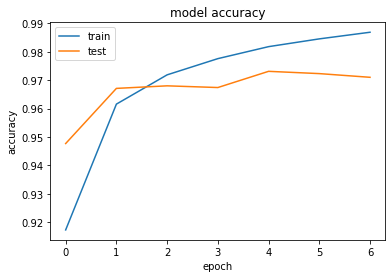

In [ ]:
# Importer une fonction pour arrêter le modèle avant l'overfiting

from tensorflow.keras.callbacks import EarlyStopping

mycallbacks = [EarlyStopping(monitor='val_loss', patience=2)]

history = model.fit(
  train_images, #inputs
  to_categorical(train_labels), #target vector
  epochs=20, # number of epochs
  batch_size=32,
  callbacks = mycallbacks, # early stopping
  validation_data=(test_images, to_categorical(test_labels)))

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**8.2. Dropout**

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7077 - accuracy: 0.7779 - val_loss: 0.2621 - val_accuracy: 0.9228
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4349 - accuracy: 0.8754 - val_loss: 0.1983 - val_accuracy: 0.9406
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8916 - val_loss: 0.1735 - val_accuracy: 0.9485
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.9007 - val_loss: 0.1675 - val_accuracy: 0.9494
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3261 - accuracy: 0.9073 - val_loss: 0.1598 - val_accuracy: 0.9536
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.9114 - val_loss: 0.1499 - val_accuracy: 0.9555
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.9137 - val_loss: 0.1531 - val_accuracy:

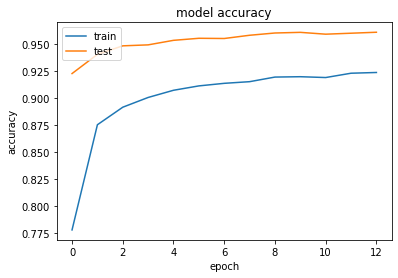

In [ ]:
# Construction d'un modèle 
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')])

# Compiler le modèle
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
# Importer une fonction pour arrêter le modèle avant l'overfiting

# Paramétrer la fonction d'EarlyStopping
mycallbacks = [EarlyStopping(monitor='val_loss', patience=3)]

# Entrainement
history = model.fit(
  train_images, #inputs
  to_categorical(train_labels), #target vector
  epochs=20, # number of epochs
  batch_size=32,
  callbacks = mycallbacks, # early stopping
  validation_data=(test_images, to_categorical(test_labels)))

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()